#Zomato Vizualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('zomato.csv', encoding='latin-1')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#1 Remove unnecessary columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
df.drop(['url','address','phone','dish_liked','reviews_list','menu_item','listed_in(type)','listed_in(city)'],axis=1,inplace=True)

In [5]:
df.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600


In [6]:
print("Shape: " + str(df.shape))
print("\nNull Values: \n")
print(df.isnull().sum())


Shape: (51717, 9)

Null Values: 

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
dtype: int64


#2 Treating Ratings column

In [7]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [8]:
df['rate'].fillna(0,inplace=True)

In [9]:
df['rate'].isnull().sum()

0

In [10]:
df['rate'].replace(['NEW','-'],0,inplace=True)

In [11]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 0, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
df['rate'].replace(['/5', " "],'',regex=True,inplace=True)

In [13]:
df['rate'] = df['rate'].astype(float)

In [14]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

#Treat Location column

In [15]:
df['location'].isnull().sum()

21

In [16]:
df = df.dropna(subset=['location'])

In [17]:
df.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                         0
rest_type                      206
cuisines                        24
approx_cost(for two people)    325
dtype: int64

#Treating rest_type column

In [18]:
df.head(10)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Cafe, Italian, Continental",700
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550


In [19]:
df = df.dropna(subset=['rest_type'])

In [20]:
df['rest_type'].unique().__len__()

93

In [21]:
def separate_rest_type(x):
    return x.split(',')[0]

df['rest_type'] =df['rest_type'].apply(separate_rest_type)
df['rest_type'].unique().__len__()

23

In [22]:
df.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                         0
rest_type                        0
cuisines                        24
approx_cost(for two people)    323
dtype: int64

#treating cuisines column

In [23]:
df['cuisines'].isnull().sum()

24

In [24]:
df = df.dropna(subset=['cuisines'])

In [25]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [26]:
df['cuisines'].unique().__len__()

2712

In [27]:
df['cuisines'] = df['cuisines'].apply(lambda x: x.split(',')[0])

In [28]:
df['cuisines'].unique().__len__()

87

In [29]:
cuisine = dict(df['cuisines'].value_counts())
def name_other(x):
    if cuisine[x]<450:
        return 'other'
    else:
        return x
    
df['cuisines'] = df['cuisines'].apply(name_other)

In [30]:
df['cuisines'].unique().__len__()

23

In [31]:
df['cuisines'].value_counts()

North Indian    12217
other            5275
South Indian     5010
Cafe             4330
Chinese          3054
Biryani          3028
Fast Food        2580
Bakery           2169
Desserts         2147
Continental      1845
Beverages        1251
Andhra           1202
Ice Cream         918
Kerala            883
Street Food       835
Mithai            707
Finger Food       703
Italian           669
Pizza             651
Arabian           554
American          532
Burger            455
Healthy Food      451
Name: cuisines, dtype: int64

In [32]:
df.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                         0
rest_type                        0
cuisines                         0
approx_cost(for two people)    318
dtype: int64

#treating approx_cost column

In [33]:
df['approx_cost(for two people)'].isnull().sum()

318

In [34]:
df.dropna(subset=['approx_cost(for two people)'],inplace=True)

In [35]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [36]:
def convert_cost(x):
    return x.replace(',','')
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(convert_cost)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(int)


In [37]:
df.reset_index(inplace=True)

In [38]:
df.drop(['index'],axis=1,inplace=True)

In [39]:
df.shape

(51148, 9)

In [40]:
df.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,North Indian,800
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Chinese,800
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Cafe,Cafe,800
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,South Indian,300
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,North Indian,600


In [41]:
df.rename(columns={'approx_cost(for two people)':'cost_for_2'},inplace=True)

In [42]:
df.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_2
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,North Indian,800
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Chinese,800
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Cafe,Cafe,800
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,South Indian,300
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,North Indian,600


In [43]:
df.rename(columns={'rate':'ratings'},inplace=True)

In [44]:
df.head()

,name,online_order,book_table,ratings,votes,location,rest_type,cuisines,cost_for_2
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,North Indian,800
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Chinese,800
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Cafe,Cafe,800
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,South Indian,300
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,North Indian,600


In [45]:
sns.set_style('darkgrid')
# df.groupby('rest_type')['rest_type'].count().sort_values(ascending=False)

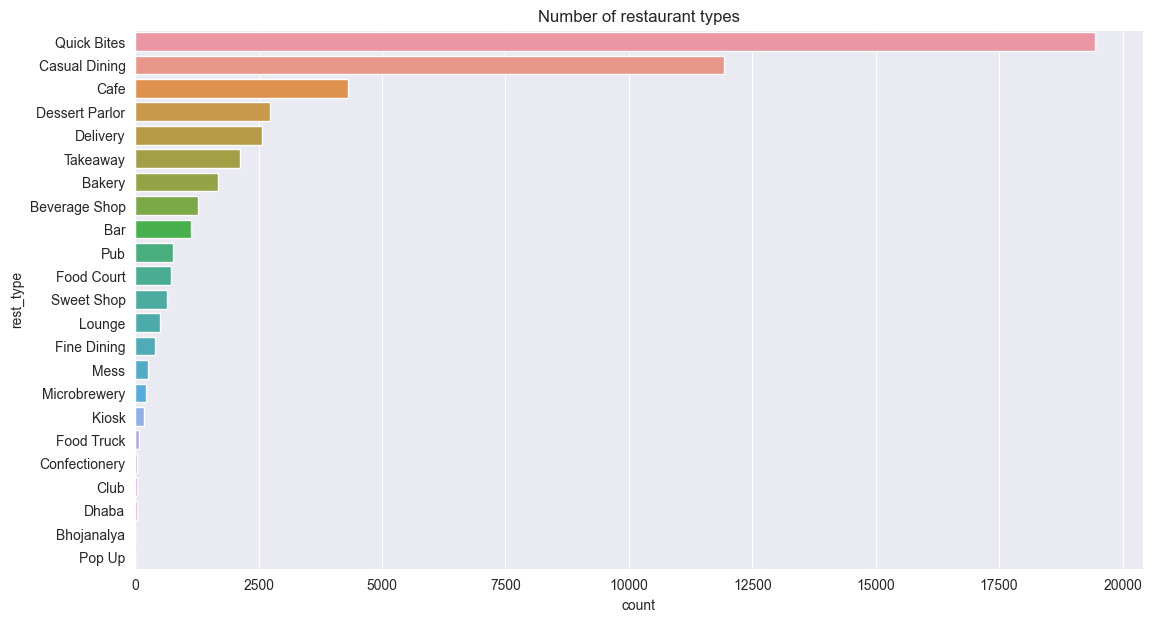

In [46]:
plt.figure(figsize=(13,7))
plt.title('Number of restaurant types')
sns.countplot(y=df['rest_type'],order=df['rest_type'].value_counts().index);

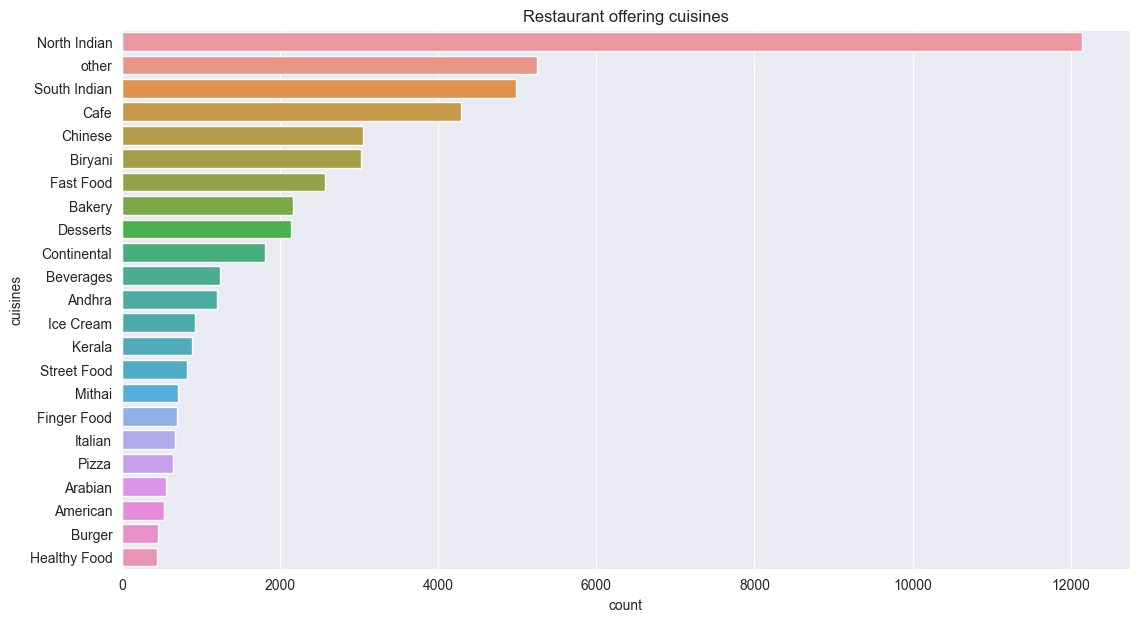

In [47]:
# Plot the histogram with cuisine names on the left and counts on the bottom
plt.figure(figsize=(13, 7))
plt.title('Restaurant offering cuisines')

sns.countplot(y=df['cuisines'],order=df['cuisines'].value_counts().index);

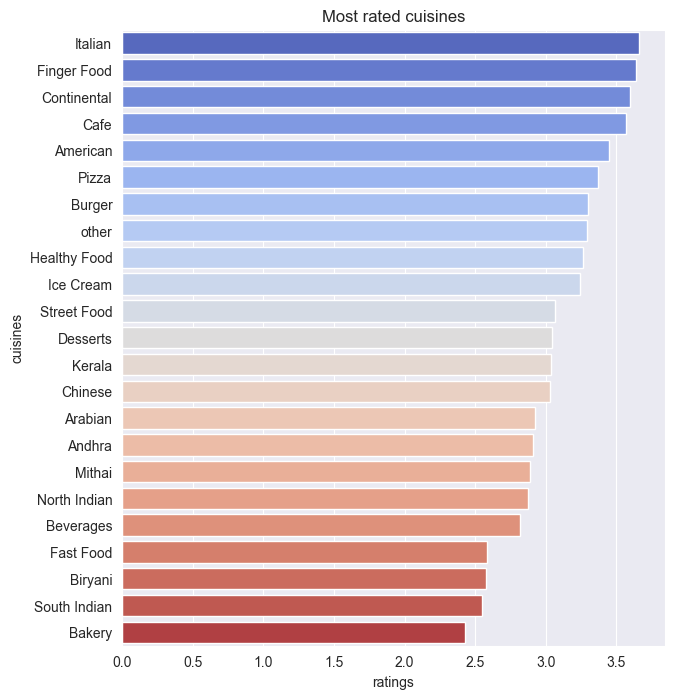

In [48]:
#most rated cuisines
cuisine_ratings = df.groupby('cuisines')['ratings'].mean().reset_index()
cuisine_ratings_sorted = cuisine_ratings.sort_values(by='ratings', ascending=False)
plt.figure(figsize=(7,8))
plt.title('Most rated cuisines')
sns.barplot(y=cuisine_ratings_sorted['cuisines'], x=cuisine_ratings_sorted['ratings'],palette =sns.color_palette("coolwarm", len(cuisine_ratings_sorted['cuisines'])));

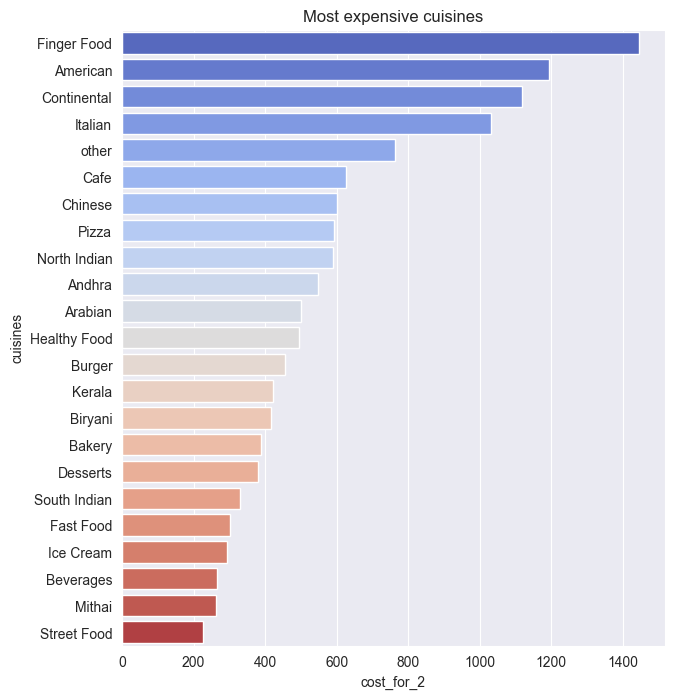

In [49]:
#most expensive cuisines
cuisine_cost = df.groupby('cuisines')['cost_for_2'].mean().reset_index()
cuisine_cost_sorted = cuisine_cost.sort_values(by='cost_for_2', ascending=False)
plt.figure(figsize=(7,8))
plt.title('Most expensive cuisines')
sns.barplot(y=cuisine_cost_sorted['cuisines'], x=cuisine_cost_sorted['cost_for_2'],palette =sns.color_palette("coolwarm", len(cuisine_cost_sorted['cuisines'])));

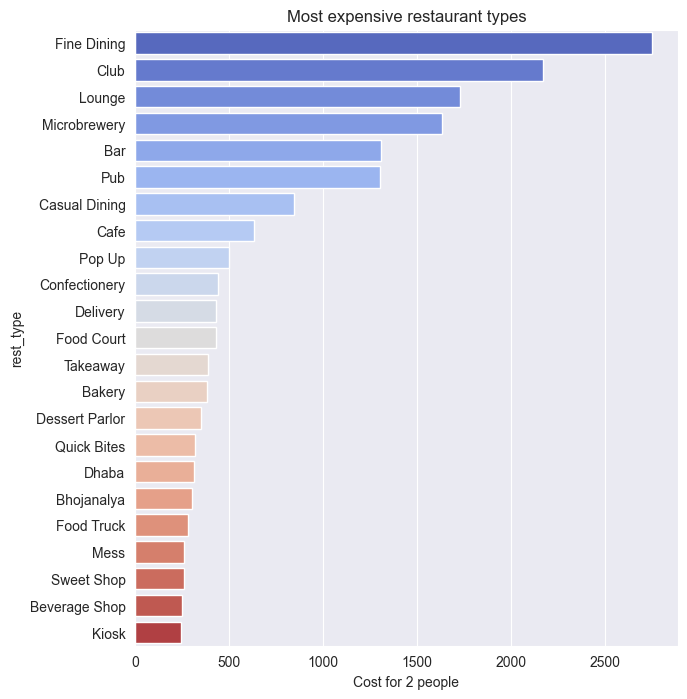

In [50]:
#most expensive restaurant types
rest_type_cost = df.groupby('rest_type')['cost_for_2'].mean().reset_index()
rest_type_cost_sorted = rest_type_cost.sort_values(by='cost_for_2', ascending=False)
plt.figure(figsize=(7,8))
plt.title('Most expensive restaurant types')
sns.barplot(y=rest_type_cost_sorted['rest_type'], x=rest_type_cost_sorted['cost_for_2'],palette =sns.color_palette("coolwarm", len(rest_type_cost_sorted['rest_type'])));
plt.xlabel('Cost for 2 people');

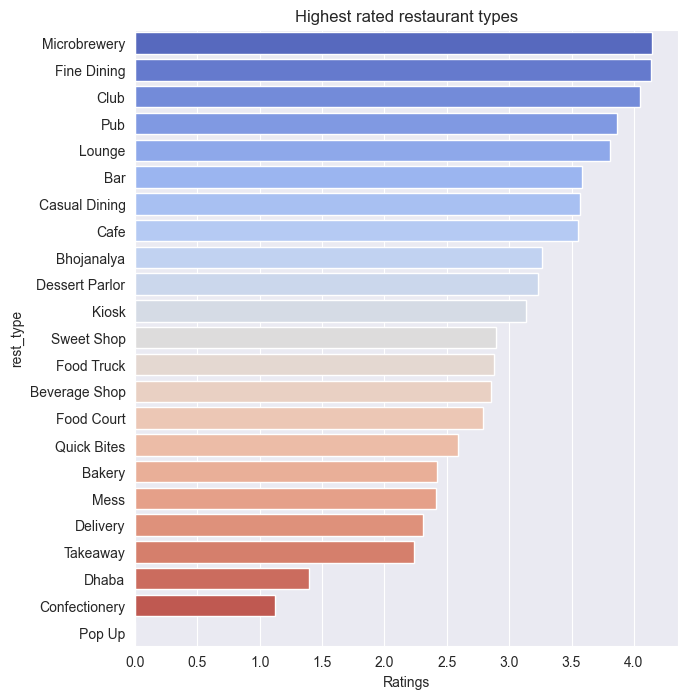

In [51]:
#most rated restaurant types
rest_type_ratings = df.groupby('rest_type')['ratings'].mean().reset_index()
rest_type_ratings_sorted = rest_type_ratings.sort_values(by='ratings', ascending=False)
plt.figure(figsize=(7,8))
plt.title('Highest rated restaurant types')
sns.barplot(y=rest_type_ratings_sorted['rest_type'], x=rest_type_ratings_sorted['ratings'],palette =sns.color_palette("coolwarm", len(rest_type_ratings_sorted['rest_type'])));
plt.xlabel('Ratings');

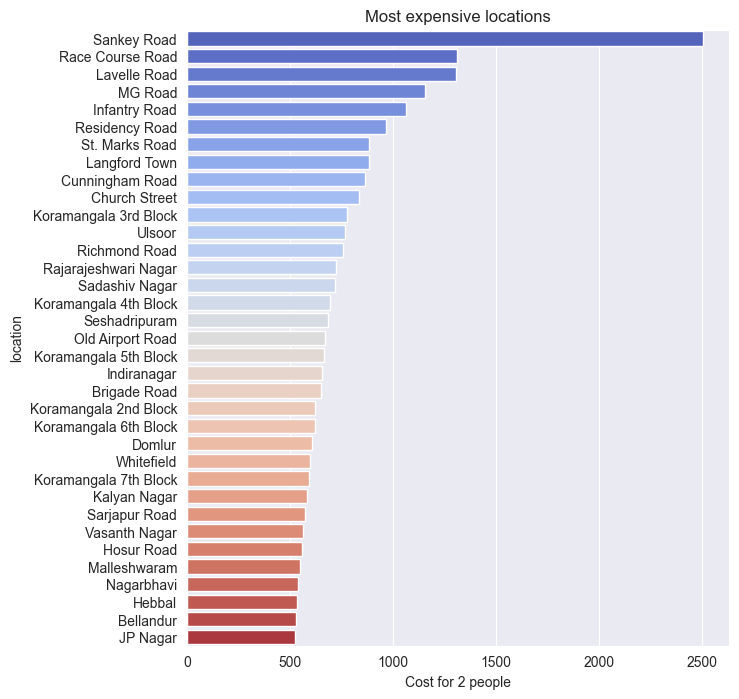

In [52]:
#most expensive locations
location_cost = df.groupby('location')['cost_for_2'].mean().reset_index()
location_cost_sorted = location_cost.sort_values(by='cost_for_2', ascending=False).head(35)
plt.figure(figsize=(7,8))
plt.title('Most expensive locations')
sns.barplot(y=location_cost_sorted['location'], x=location_cost_sorted['cost_for_2'],palette =sns.color_palette("coolwarm", len(location_cost_sorted['location'])));
plt.xlabel('Cost for 2 people');

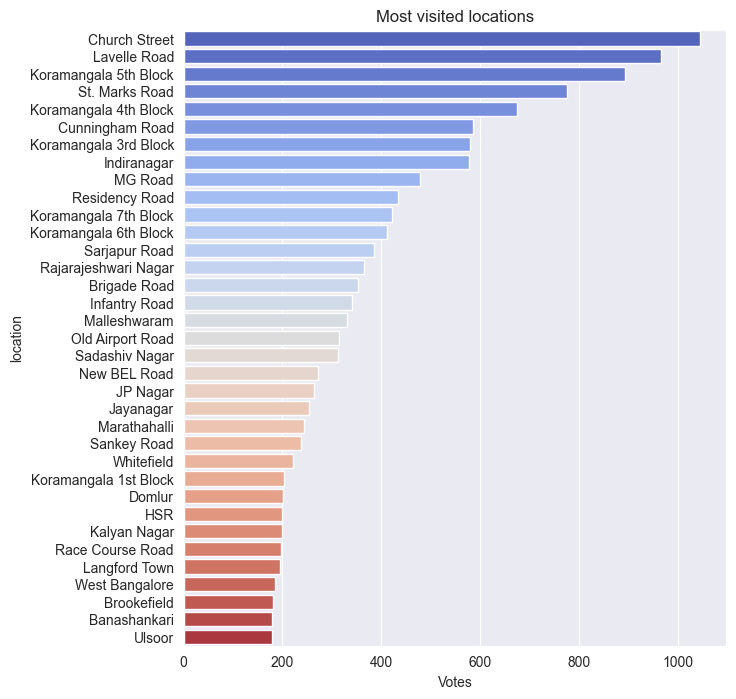

In [53]:
#most votes to a location
location_votes = df.groupby('location')['votes'].mean().reset_index()
location_votes_sorted = location_votes.sort_values(by='votes', ascending=False).head(35)
plt.figure(figsize=(7,8))
plt.title('Most visited locations')
sns.barplot(y=location_votes_sorted['location'], x=location_votes_sorted['votes'],palette =sns.color_palette("coolwarm", len(location_votes_sorted['location'])));
plt.xlabel('Votes');

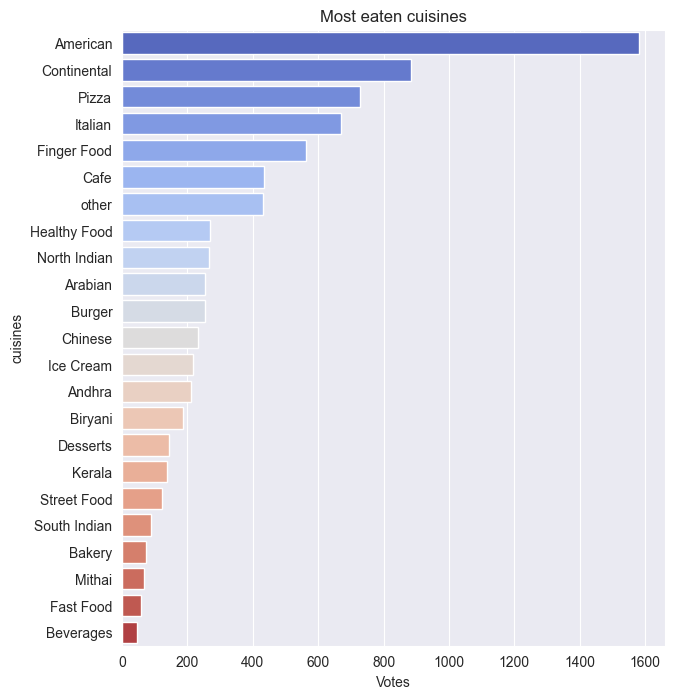

In [54]:
#most eaten cuisines
cuisine_votes = df.groupby('cuisines')['votes'].mean().reset_index()
cuisine_votes_sorted = cuisine_votes.sort_values(by='votes', ascending=False)
plt.figure(figsize=(7,8))
plt.title('Most eaten cuisines')
sns.barplot(y=cuisine_votes_sorted['cuisines'], x=cuisine_votes_sorted['votes'],palette =sns.color_palette("coolwarm", len(cuisine_votes_sorted['cuisines'])));
plt.xlabel('Votes');

In [55]:
df.head(5)

,name,online_order,book_table,ratings,votes,location,rest_type,cuisines,cost_for_2
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,North Indian,800
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Chinese,800
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Cafe,Cafe,800
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,South Indian,300
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,North Indian,600


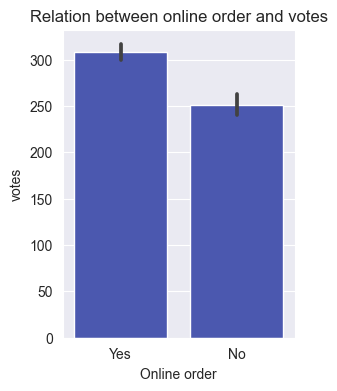

In [56]:
#relation between online order and votes
plt.figure(figsize=(3,4))
plt.title('Relation between online order and votes')
sns.barplot(x=df['online_order'],y=df['votes'],palette =sns.color_palette("coolwarm", len(df['online_order'])));
plt.xlabel('Online order');


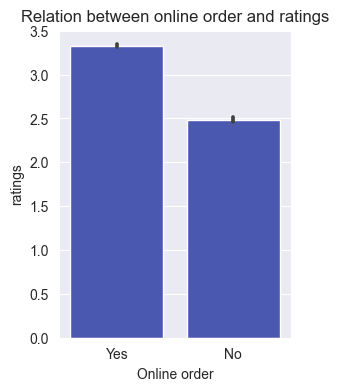

In [57]:
#relation between online order and ratings
plt.figure(figsize=(3,4))
plt.title('Relation between online order and ratings')
sns.barplot(x=df['online_order'],y=df['ratings'],palette =sns.color_palette("coolwarm", len(df['online_order'])));
plt.xlabel('Online order');


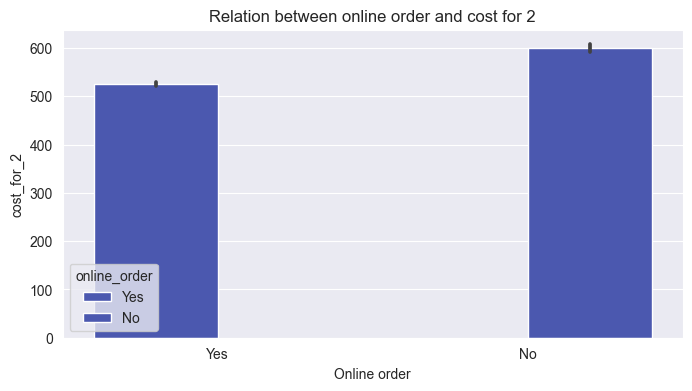

In [58]:
#relation between online order and cost for 2
plt.figure(figsize=(8,4))
plt.title('Relation between online order and cost for 2')
sns.barplot(x=df['online_order'],y=df['cost_for_2'],hue=df['online_order'], palette =sns.color_palette("coolwarm", len(df['online_order'])));
plt.xlabel('Online order');


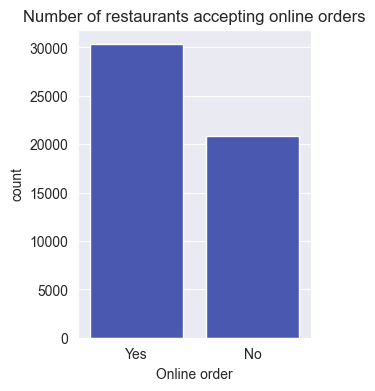

In [59]:
#number of restaurants accepting online orders
plt.figure(figsize=(3,4))
plt.title('Number of restaurants accepting online orders')
sns.countplot(x=df['online_order'],palette =sns.color_palette("coolwarm", len(df['online_order'])));
plt.xlabel('Online order');

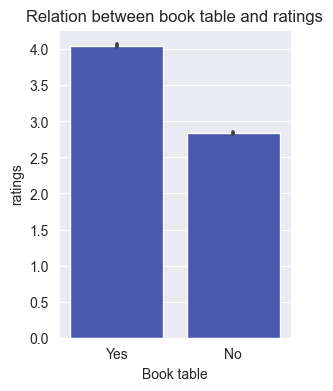

In [60]:
#relation between book table and ratings
plt.figure(figsize=(3,4))
plt.title('Relation between book table and ratings')
sns.barplot(x=df['book_table'],y=df['ratings'],palette =sns.color_palette("coolwarm", len(df['book_table'])));
plt.xlabel('Book table');


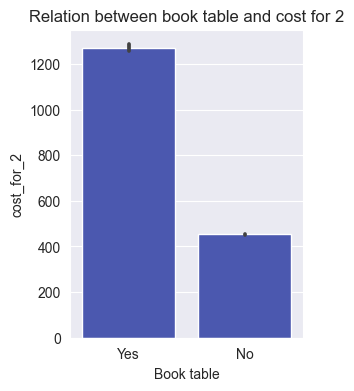

In [61]:
#relation between book table and cost for 2
plt.figure(figsize=(3,4))
plt.title('Relation between book table and cost for 2')
sns.barplot(x=df['book_table'],y=df['cost_for_2'],palette =sns.color_palette("coolwarm", len(df['book_table'])));
plt.xlabel('Book table');


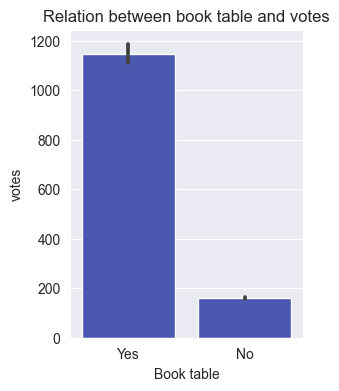

In [62]:
#relation between book table and votes
plt.figure(figsize=(3,4))
plt.title('Relation between book table and votes')
sns.barplot(x=df['book_table'],y=df['votes'],palette =sns.color_palette("coolwarm", len(df['book_table'])));
plt.xlabel('Book table');

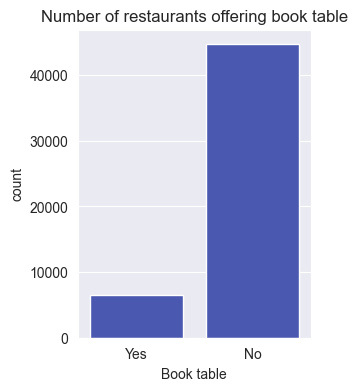

In [63]:
#number of restaurants offering book table
plt.figure(figsize=(3,4))
plt.title('Number of restaurants offering book table')
sns.countplot(x=df['book_table'],palette =sns.color_palette("coolwarm", len(df['book_table'])));
plt.xlabel('Book table');


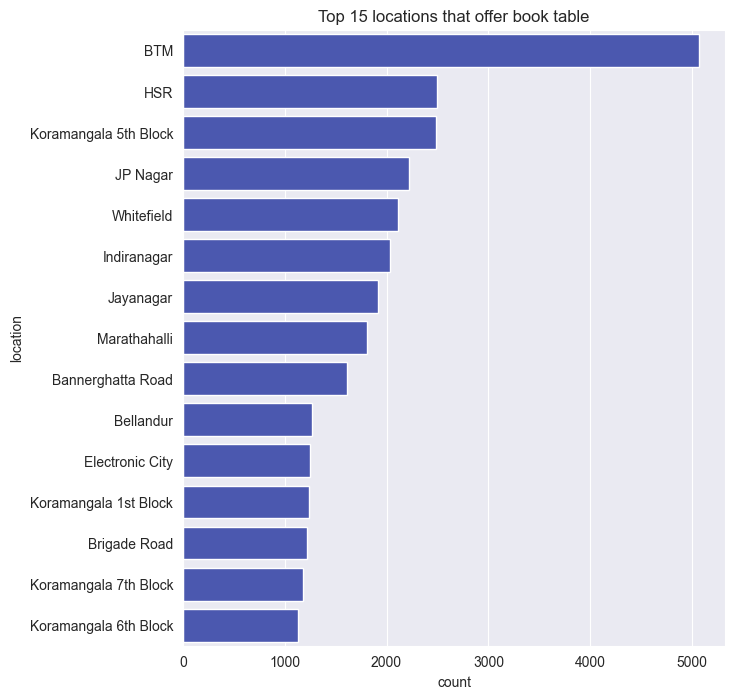

In [64]:
#name of top 15 locations that offer book table
plt.figure(figsize=(7,8))
plt.title('Top 15 locations that offer book table')
sns.countplot(y=df['location'],order=df['location'].value_counts().iloc[:15].index,palette =sns.color_palette("coolwarm", len(df['location'])));


In [65]:
df.head(5)

,name,online_order,book_table,ratings,votes,location,rest_type,cuisines,cost_for_2
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,North Indian,800
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Chinese,800
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Cafe,Cafe,800
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,South Indian,300
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,North Indian,600


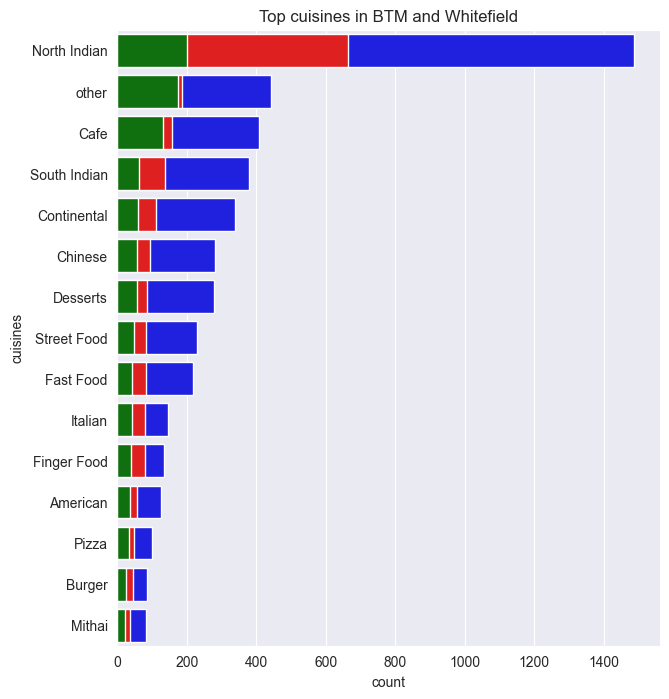

In [66]:
#top cuisines in BTM and Whitefield and Koramangala 6th Block
plt.figure(figsize=(7,8))
plt.title('Top cuisines in BTM and Whitefield')
sns.countplot(y=df[df['location']=='BTM']['cuisines'],order=df[df['location']=='BTM']['cuisines'].value_counts().iloc[:15].index,color="b");
sns.countplot(y=df[df['location']=='Whitefield']['cuisines'],order=df[df['location']=='Whitefield']['cuisines'].value_counts().iloc[:15].index,color="r");
sns.countplot(y=df[df['location']=='Koramangala 6th Block']['cuisines'],order=df[df['location']=='Koramangala 6th Block']['cuisines'].value_counts().iloc[:15].index,color="g");

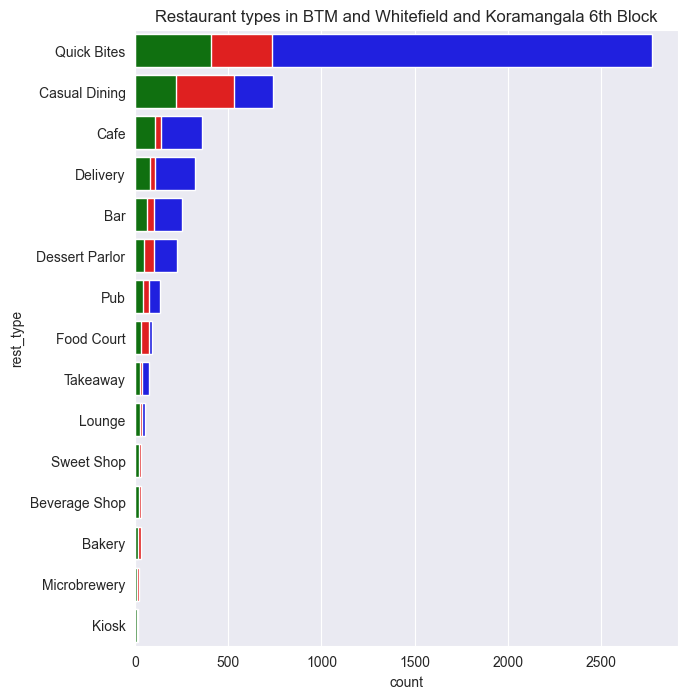

In [67]:
#restaurant types in BTM and Whitefield and Koramangala 6th Block
plt.figure(figsize=(7,8))
plt.title('Restaurant types in BTM and Whitefield and Koramangala 6th Block')
sns.countplot(y=df[df['location']=='BTM']['rest_type'],order=df[df['location']=='BTM']['rest_type'].value_counts().iloc[:15].index,color="b");
sns.countplot(y=df[df['location']=='Whitefield']['rest_type'],order=df[df['location']=='Whitefield']['rest_type'].value_counts().iloc[:15].index,color="r");
sns.countplot(y=df[df['location']=='Koramangala 6th Block']['rest_type'],order=df[df['location']=='Koramangala 6th Block']['rest_type'].value_counts().iloc[:15].index,color="g");


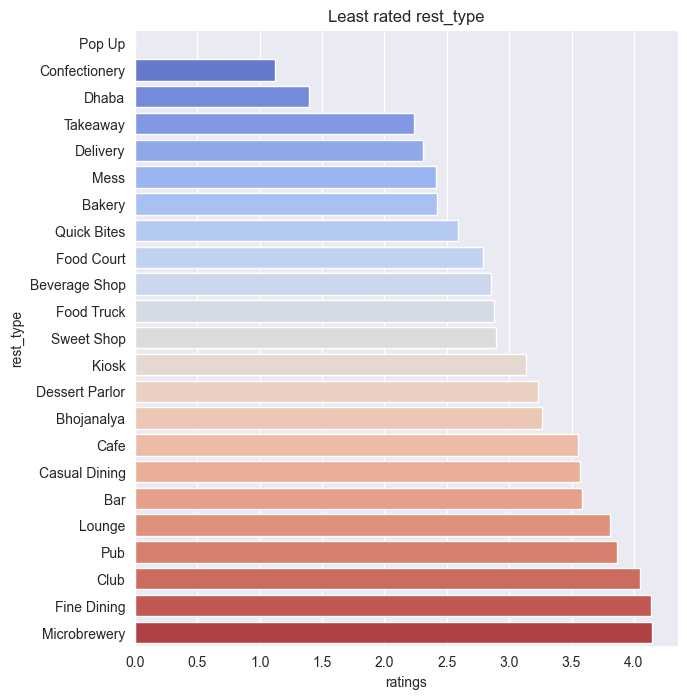

In [68]:
#least rated cuisines
cuisine_ratings = df.groupby('rest_type')['ratings'].mean().reset_index()
cuisine_ratings_sorted = cuisine_ratings.sort_values(by='ratings', ascending=True)
plt.figure(figsize=(7,8))
plt.title('Least rated rest_type')
sns.barplot(y=cuisine_ratings_sorted['rest_type'], x=cuisine_ratings_sorted['ratings'],palette =sns.color_palette("coolwarm", len(cuisine_ratings_sorted['rest_type'])));

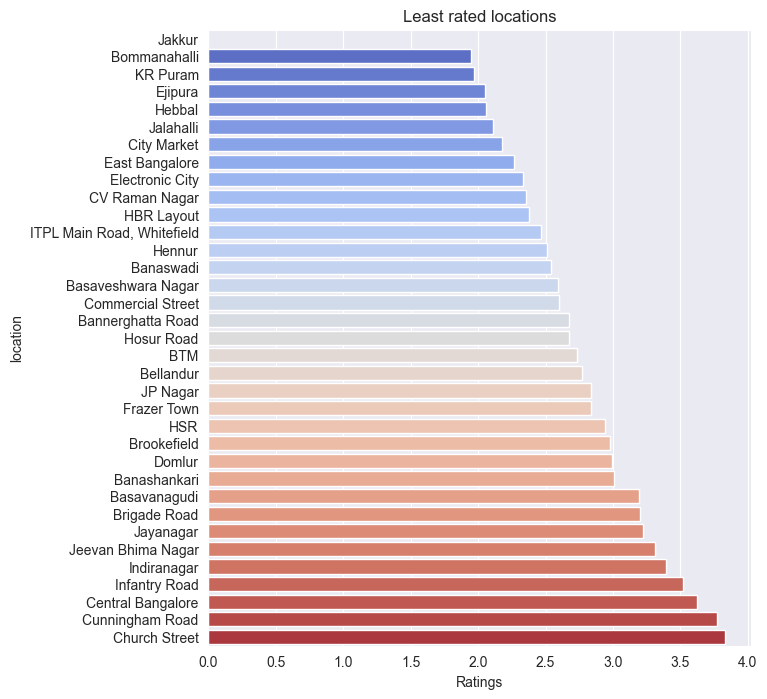

In [69]:
#least rated locations
location_ratings = df.groupby('location')['ratings'].mean().reset_index().head(35)
location_ratings_sorted = location_ratings.sort_values(by='ratings', ascending=True)
plt.figure(figsize=(7,8))
plt.title('Least rated locations')
sns.barplot(y=location_ratings_sorted['location'], x=location_ratings_sorted['ratings'],palette =sns.color_palette("coolwarm", len(location_ratings_sorted['location'])));
plt.xlabel('Ratings');

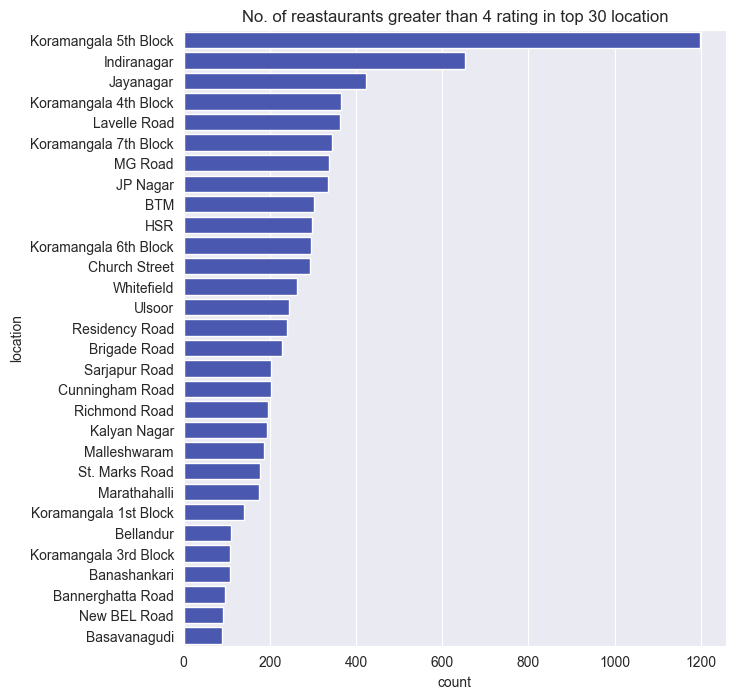

In [70]:
#no. of reastaurants greater than 4 rating in top 30 location
plt.figure(figsize=(7,8))
plt.title('No. of reastaurants greater than 4 rating in top 30 location')
sns.countplot(y=df[df['ratings']>4]['location'],order=df[df['ratings']>4]['location'].value_counts().iloc[:30].index,palette =sns.color_palette("coolwarm", len(df[df['ratings']>4]['location'])));


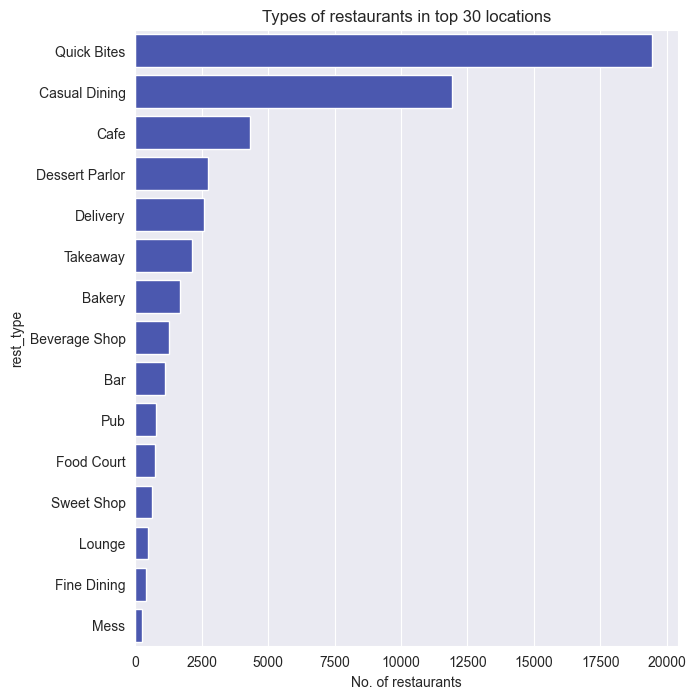

In [71]:
#types of restaurants in top 30 locations
plt.figure(figsize=(7,8))
plt.title('Types of restaurants in top 30 locations')
sns.countplot(y=df['rest_type'],order=df['rest_type'].value_counts().iloc[:15].index,palette =sns.color_palette("coolwarm", len(df['rest_type'])));
plt.xlabel('No. of restaurants');

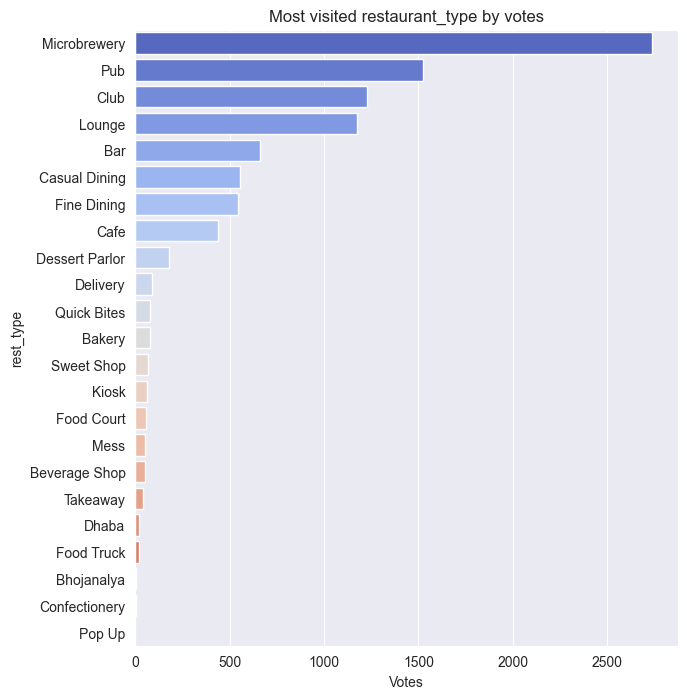

In [72]:
#Most visited restaurant_type by votes
resr_type_vote = df.groupby('rest_type')['votes'].mean().reset_index()
resr_type_vote_sorted = resr_type_vote.sort_values(by='votes', ascending=False)
plt.figure(figsize=(7,8))
plt.title('Most visited restaurant_type by votes')
sns.barplot(y=resr_type_vote_sorted['rest_type'], x=resr_type_vote_sorted['votes'],palette =sns.color_palette("coolwarm", len(resr_type_vote_sorted['rest_type'])));
plt.xlabel('Votes');

                      location   cost_for_2
19             Electronic City   497.788462
39                     Kengeri   500.000000
26  ITPL Main Road, Whitefield   501.769912
56                Marathahalli   513.910398
38             Kanakapura Road   523.684211
29                    JP Nagar   523.875620
6                    Bellandur   529.952793
23                      Hebbal   535.714286
58                  Nagarbhavi   538.888889
55                Malleshwaram   551.367403
25                  Hosur Road   559.803922
86               Vasanth Nagar   562.286689
76               Sarjapur Road   572.974261
36                Kalyan Nagar   584.351962
47       Koramangala 7th Block   594.132653
89                  Whitefield   599.838786
16                      Domlur   605.145228
46       Koramangala 6th Block   620.372011
42       Koramangala 2nd Block   622.549020
8                 Brigade Road   650.935961
27                 Indiranagar   654.412199
45       Koramangala 5th Block  

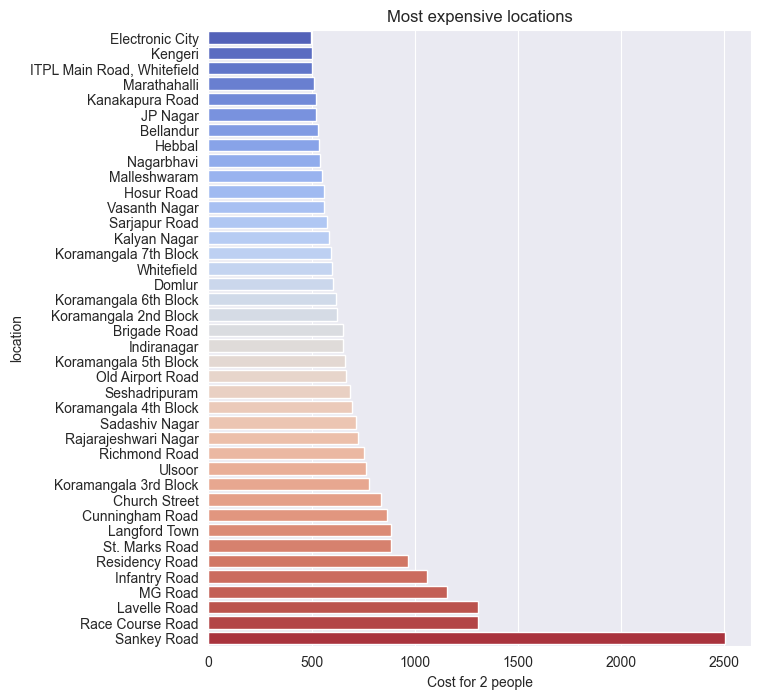

In [74]:
#least expensive locations
location_cost = df.groupby('location')['cost_for_2'].mean().reset_index()
location_cost_sorted = location_cost.sort_values(by='cost_for_2', ascending=True).tail(40)
print(location_cost_sorted)
plt.figure(figsize=(7,8))
plt.title('Most expensive locations')
sns.barplot(y=location_cost_sorted['location'], x=location_cost_sorted['cost_for_2'],palette =sns.color_palette("coolwarm", len(location_cost_sorted['location'])));
plt.xlabel('Cost for 2 people');